In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -U ultralytics
!pip install torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.2 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
import torch

print("✅ Torch version:", torch.__version__)
print("✅ CUDA available:", torch.cuda.is_available())
print("✅ Ultralytics setup complete!")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Torch version: 2.8.0+cu126
✅ CUDA available: True
✅ Ultralytics setup complete!


In [4]:
# Check that dataset folders exist inside your Drive
!ls /content/drive/MyDrive/isb_dataset_soil/soil_detection


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [7]:
#Check your data.yaml content
!cat /content/drive/MyDrive/isb_dataset_soil/soil_detection/data.yaml


train: /content/drive/MyDrive/isb_dataset_soil/soil_detection/train/images
val: /content/drive/MyDrive/isb_dataset_soil/soil_detection/valid/images
test: /content/drive/MyDrive/isb_dataset_soil/soil_detection/test/images

nc: 4
names: ['Alluvial Soil', 'Black Soil', 'Clay Soil', 'Red Soil']

roboflow:
  workspace: imit-h5ows
  project: soil-detection-l0ngo
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/imit-h5ows/soil-detection-l0ngo/dataset/2

In [12]:
from ultralytics import YOLO

model = YOLO("yolo11m.pt")  # small model; faster training


In [13]:
%env WANDB_MODE=disabled


env: WANDB_MODE=disabled


In [14]:
model.train(
    data="/content/drive/MyDrive/isb_dataset_soil/soil_detection/data.yaml",
    epochs=100,
    imgsz=640,
    batch=8,
    name="soil_detection_v2",
    pretrained=True,
    workers=8,
    device=0
)


Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/isb_dataset_soil/soil_detection/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=soil_detection_v2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pati

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78bbee589880>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [18]:
import numpy as np

# Metrics from your output
precision = 0.5913458069173113
recall = 0.6051530627769017
map50 = 0.5696391159385541
map50_95 = 0.35188550184459394
fitness = 0.35188550184459394

# F1-score
f1 = 2 * (precision * recall) / (precision + recall)

# Approximate accuracy
accuracy = (precision * recall) / ((precision * recall) + (1 - precision) * (1 - recall))

# Multiply by 100 for percentages
precision *= 100
recall *= 100
f1 *= 100
accuracy *= 100
map50 *= 100
map50_95 *= 100
fitness *= 100

print(f"Precision       : {precision:.2f}%")
print(f"Recall          : {recall:.2f}%")
print(f"F1-score        : {f1:.2f}%")
print(f"Accuracy (approx): {accuracy:.2f}%")
print(f"mAP50           : {map50:.2f}%")
print(f"mAP50-95        : {map50_95:.2f}%")
print(f"Fitness         : {fitness:.2f}%")


Precision       : 59.13%
Recall          : 60.52%
F1-score        : 59.82%
Accuracy (approx): 68.92%
mAP50           : 56.96%
mAP50-95        : 35.19%
Fitness         : 35.19%


In [19]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/runs/detect/soil_detection_v2/weights/best.pt")

# Validate on validation dataset
metrics = model.val(
    data="/content/drive/MyDrive/isb_dataset_soil/soil_detection/data.yaml",
    imgsz=640,     # image size
    batch=8
)


Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.7±0.3 ms, read: 36.0±6.2 MB/s, size: 58.9 KB)
val: Scanning /content/drive/MyDrive/isb_dataset_soil/soil_detection/valid/labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 58/58 96.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 3.1it/s 2.6s
                   all         58         72       0.59      0.606      0.571      0.352
         Alluvial Soil         18         21      0.427      0.667      0.474      0.272
            Black Soil         17         21      0.796      0.857      0.856      0.547
             Clay Soil          9         11      0.594      0.268      0.374      0.241
              Red Soil         15         19      0.544      0.632       0.58      0.348
Speed: 4.6ms pr

In [22]:
results = model.predict(
    source="/content/drive/MyDrive/isb_dataset_soil/soil_detection/test/images",
    imgsz=640,
    save=True          # saves annotated images in runs/predict
)



image 1/28 /content/drive/MyDrive/isb_dataset_soil/soil_detection/test/images/Black_38_jpg.rf.cce2afe5e739cb1d77fbdfd7d51d5012.jpg: 640x640 1 Black Soil, 36.9ms
image 2/28 /content/drive/MyDrive/isb_dataset_soil/soil_detection/test/images/Black_44_jpg.rf.bfb078e5b0304edb36b2cc1d57ea3cbc.jpg: 640x640 1 Black Soil, 36.9ms
image 3/28 /content/drive/MyDrive/isb_dataset_soil/soil_detection/test/images/Black_47_jpg.rf.30fa0ac078480d4fbb2bdb6bd4c189c3.jpg: 640x640 1 Black Soil, 37.0ms
image 4/28 /content/drive/MyDrive/isb_dataset_soil/soil_detection/test/images/Clay_47_jpg.rf.75ea8b632fb8f5e1a540b31945d9ff4d.jpg: 640x640 1 Clay Soil, 37.0ms
image 5/28 /content/drive/MyDrive/isb_dataset_soil/soil_detection/test/images/Copy-of-clay-soil-cropped_jpg.rf.9dfcef24065c2fa79a282f89bff22b80.jpg: 640x640 1 Clay Soil, 36.9ms
image 6/28 /content/drive/MyDrive/isb_dataset_soil/soil_detection/test/images/Copy-of-image14_jpeg.rf.4e376475395c1adc2faba2ce470bf93e.jpg: 640x640 1 Red Soil, 37.0ms
image 7/28 /c

array([[[  0,   9,  19],
        [  0,   8,  18],
        [ 54,  58,  18],
        ...,
        [ 69,  68,  19],
        [ 12,  14,  24],
        [ 11,  13,  23]],

       [[  2,  11,  21],
        [  2,  11,  21],
        [ 50,  54,  21],
        ...,
        [ 64,  63,  22],
        [ 15,  17,  27],
        [ 14,  16,  26]],

       [[ 10,  19,  29],
        [ 10,  19,  29],
        [ 56,  60,  24],
        ...,
        [ 60,  58,  19],
        [  9,  11,  21],
        [  8,  10,  20]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
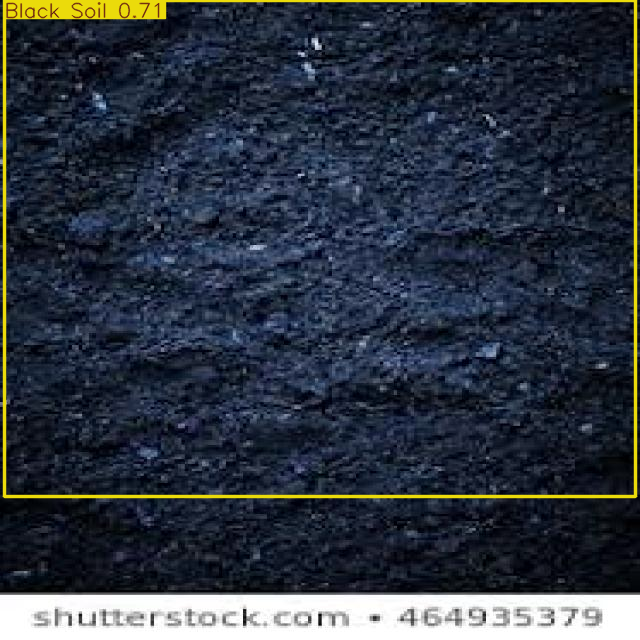

In [23]:
results[0].plot()   # plots first image prediction
